# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [2]:
#DATA PRE-PROCESSING
# Import necessary libraries
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv('Duolingo dataset.csv')
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Drop 'Unnamed' columns which often appear as artifacts from CSV export
unnamed_cols = [col for col in data.columns if 'Unnamed' in col]
data.drop(columns=unnamed_cols, inplace=True)

# Replace 'na' strings with NaN
data.replace('na', np.nan, inplace=True)
# Drop rows with missing values
data.dropna(inplace=True)
print(data.info())
# Remove duplicate rows (if any)
data.drop_duplicates(inplace=True)

# The following lines caused a KeyError because 'Reading', 'unit', and 'CC Charge' are not actual column names in the dataset.
# If you intended to use other columns, please update these lines with the correct column names.
# data['Reading'] = data['Reading'].abs()
# data['unit'] = data['unit'].abs()
# data['CC Charge'] = data['CC Charge'].abs()

First few rows of the dataset:
   Row_ID  Date_YYYYMMDD  User_ID  Age  Days_Active  Lessons_Completed  \
0       1       20260101  2026001   31          285                 12   
1       2       20260101  2026002   37          255                 10   
2       3       20260101  2026003   26          334                 22   
3       4       20260101  2026004   39          354                  7   
4       5       20260101  2026005   40           79                  8   

   XP_Earned  Time_Spent_Min  Streak_Days  Mistakes_Made  ...  Skill_Strength  \
0        300              48          152              4  ...            90.7   
1        328              30          150              4  ...            93.4   
2        676              44          110              5  ...            86.9   
3        220              26          148              2  ...            93.7   
4        200              66           60              8  ...            80.5   

   Unnamed: 16  Unnamed: 17  Unnamed:

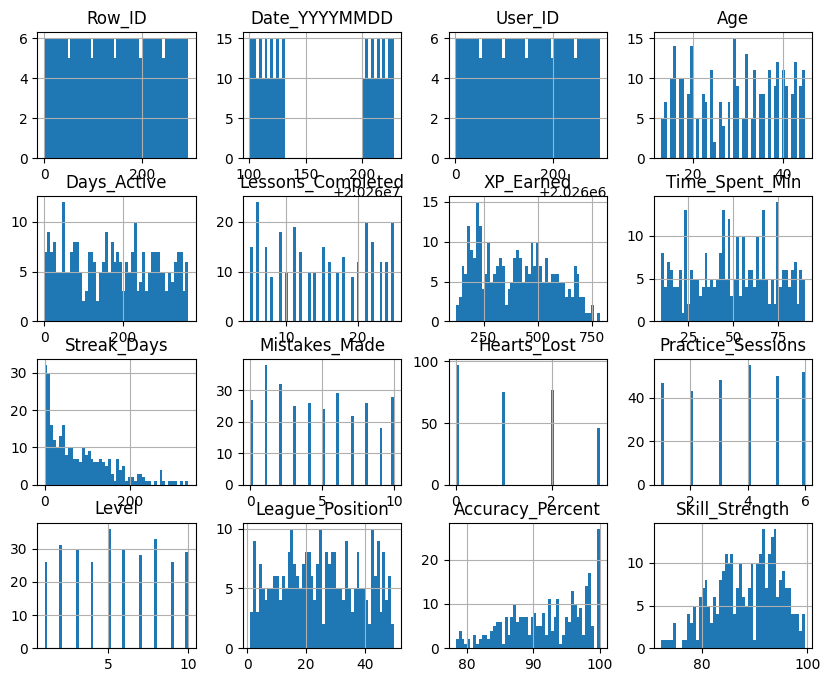

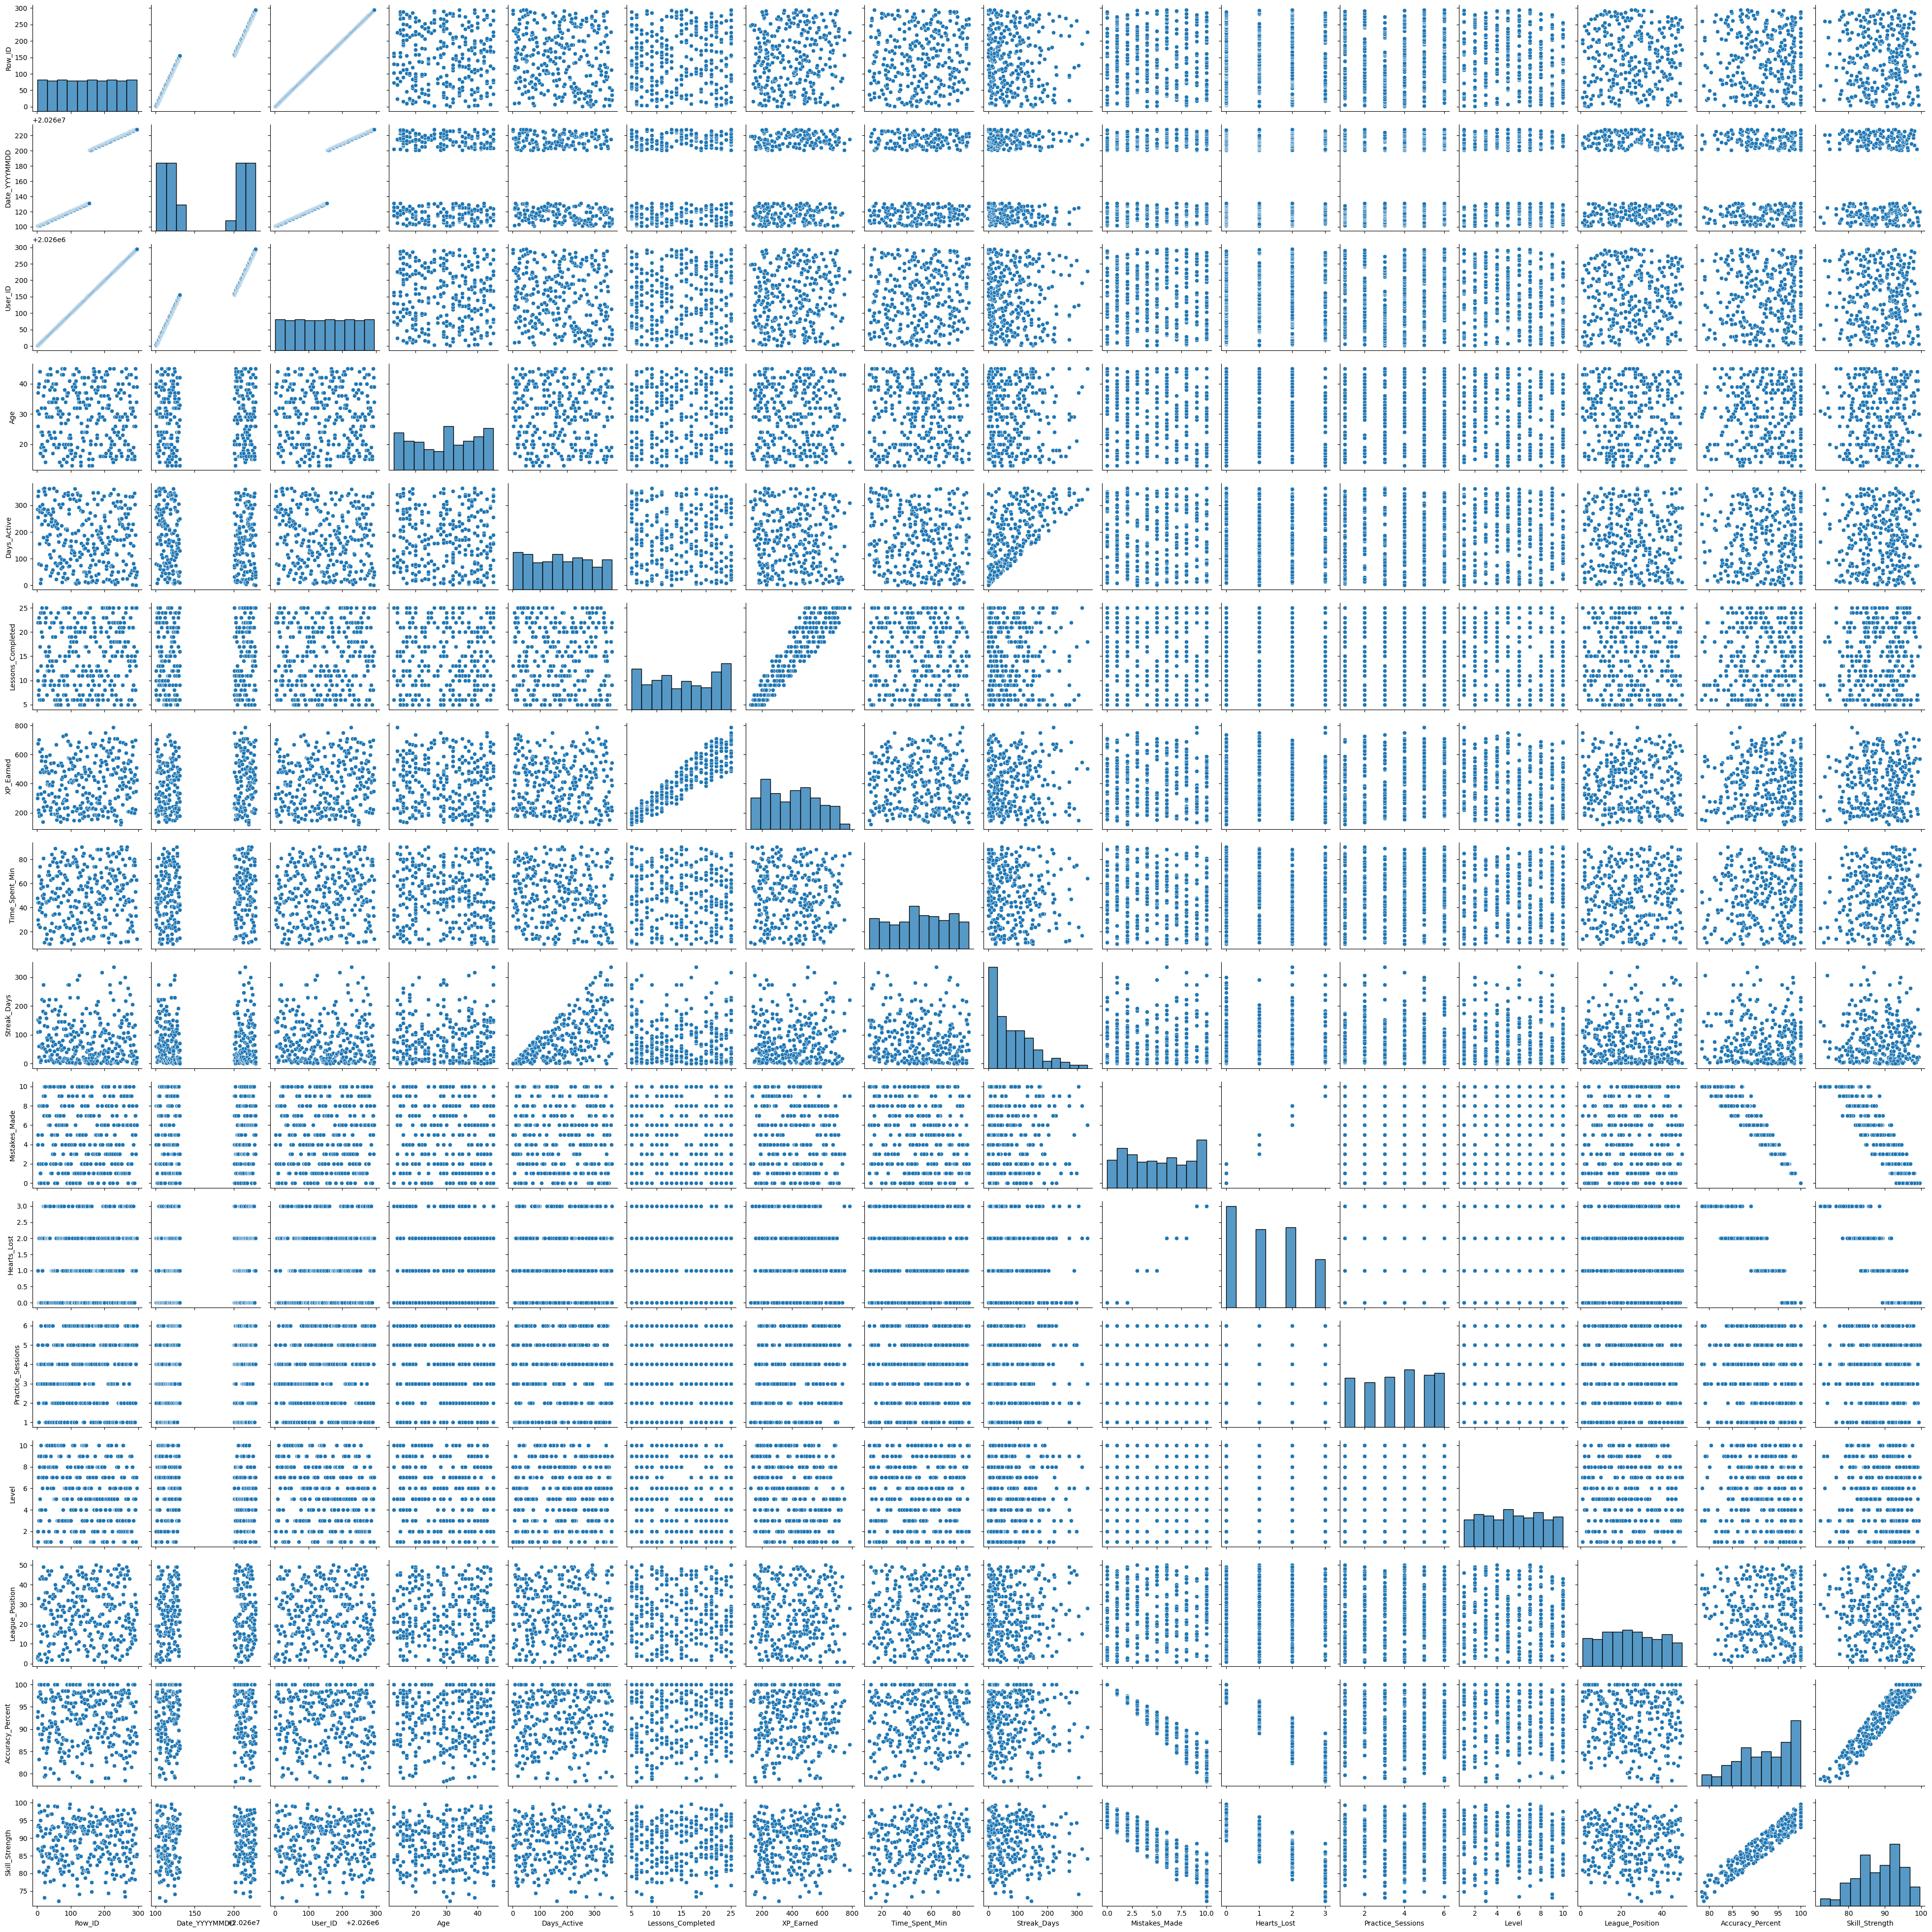

Text(0.5, 1.0, 'Correlation Heatmap')

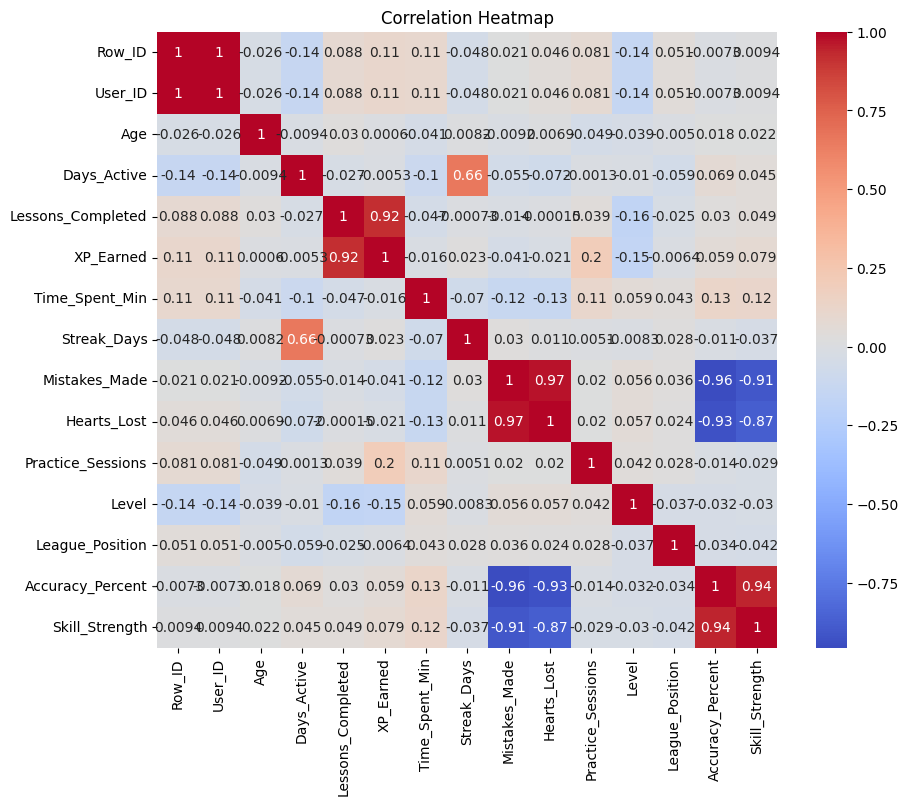

In [4]:
# DATA Visualization
# Import necessary visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Plot histograms for numerical features
data.hist(bins=50, figsize=(10, 8))
plt.show()
# Pairplot to visualize relationships between features
sns.pairplot(data)
plt.show()
# Correlation heatmap (excluding date column)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['Date_YYYYMMDD']).corr(), annot=True,
cmap='coolwarm')
plt.title('Correlation Heatmap')

In [6]:
#scaling
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Feature Scaling (Standardization)
scaler = StandardScaler()
# Select columns to scale
# Update this list with actual column names from your DataFrame that you want to scale.
# For example, you might want to scale numerical columns like Age, XP_Earned, Time_Spent_Min, etc.
# Based on data.info(), some numerical columns are: 'Age', 'Days_Active', 'Lessons_Completed', 'XP_Earned', 'Time_Spent_Min', 'Streak_Days', 'Mistakes_Made', 'Hearts_Lost', 'Practice_Sessions', 'Level', 'League_Position', 'Accuracy_Percent', 'Skill_Strength'
columns_to_scale = ['Age', 'XP_Earned', 'Time_Spent_Min', 'Accuracy_Percent', 'Skill_Strength'] # Example: Replace with your desired columns

# Fit and transform the data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
print("Data after scaling:")
print(data.head())

Data after scaling:
   Row_ID  Date_YYYYMMDD  User_ID       Age  Days_Active  Lessons_Completed  \
0       1       20260101  2026001  0.150249          285                 12   
1       2       20260101  2026002  0.765854          255                 10   
2       3       20260101  2026003 -0.362755          334                 22   
3       4       20260101  2026004  0.971056          354                  7   
4       5       20260101  2026005  1.073657           79                  8   

   XP_Earned  Time_Spent_Min  Streak_Days  Mistakes_Made  Hearts_Lost  \
0  -0.614978       -0.101144          152              4            1   
1  -0.447717       -0.905150          150              4            1   
2   1.631100       -0.279812          110              5            1   
3  -1.092867       -1.083818          148              2            0   
4  -1.212339        0.702861           60              8            2   

   Practice_Sessions  Level  League_Position  Accuracy_Percent  Sk

In [12]:
#feature selection
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression # Fixed SyntaxError

# Define the target variable
# IMPORTANT: 'unit' is not a column in your DataFrame. Please choose an existing column as your target variable.
# For example, you might want to predict 'XP_Earned', 'Lessons_Completed', or 'Skill_Strength'.
# You can see available columns from the previous 'data.info()' output:
# ['Row_ID', 'Date_YYYYMMDD', 'User_ID', 'Age', 'Days_Active', 'Lessons_Completed', 'XP_Earned', 'Time_Spent_Min', 'Streak_Days', 'Mistakes_Made', 'Hearts_Lost', 'Practice_Sessions', 'Level', 'League_Position', 'Accuracy_Percent', 'Skill_Strength']

# Example of how to define a target:
# target = 'XP_Earned'
target = 'XP_Earned' # Placeholder, please choose your actual target

# Note: 'Date of Reading' is not a column. If you intend to exclude a date column, use 'Date_YYYYMMMMDD'.
# If you don't want to drop any date column, remove 'Date_YYYYMMDD' from the list below.
features = data.drop(columns=[target, 'Date_YYYYMMDD']) # Example of dropping the target and date column

# Univariate Selection (Mutual Information)
# SelectKBest for feature selection
X = features # Input features
y = data[target] # Target variable
mutual_info_selector = SelectKBest(mutual_info_regression, k=2) # Select top 2 features
X_kbest = mutual_info_selector.fit_transform(X, y)

# Get selected features
selected_features_mutual_info = X.columns[mutual_info_selector.get_support()]
print("Selected features using Mutual Information:", selected_features_mutual_info)

# Create a new DataFrame with the selected features for training
X_selected = pd.DataFrame(X_kbest, columns=selected_features_mutual_info)
print("Data with selected features:")
print(X_selected.head())

Selected features using Mutual Information: Index(['Lessons_Completed', 'Mistakes_Made'], dtype='object')
Data with selected features:
   Lessons_Completed  Mistakes_Made
0               12.0            4.0
1               10.0            4.0
2               22.0            5.0
3                7.0            2.0
4                8.0            8.0


In [14]:
# modeling
# Import necessary libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
test_size=0.2, random_state=42)
# Dictionary to store model performance and predictions
model_performance = {}
model_predictions = {}
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
model_performance['Linear Regression'] = lr_mse
model_predictions['Linear Regression'] = lr_pred
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
model_performance['Decision Tree Regressor'] = dt_mse
model_predictions['Decision Tree Regressor'] = dt_pred
# RandomForest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
model_performance['RandomForest Regressor'] = rf_mse
model_predictions['RandomForest Regressor'] = rf_pred
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
model_performance['Gradient Boosting Regressor'] = gb_mse
model_predictions['Gradient Boosting Regressor'] = gb_pred
# Support Vector Regressor (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
model_performance['Support Vector Regressor'] = svr_mse
model_predictions['Support Vector Regressor'] = svr_pred
# Display model performance
for model, mse in model_performance.items():
    print(f"{model}: Mean Squared Error = {mse}")
# View the dataset with predictions from the best model (choose model with the lowest MSE)
best_model = min(model_performance, key=model_performance.get)
print(f"\nBest Model: {best_model} with MSE = {model_performance[best_model]}")
# Adding predictions to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual'] = y_test
X_test_with_predictions['Predicted'] = model_predictions[best_model]
# Display the dataset with actual and predicted values
print("\nDataset with Actual and Predicted values:")
print(X_test_with_predictions.head())

Linear Regression: Mean Squared Error = 0.16088543610213463
Decision Tree Regressor: Mean Squared Error = 0.2392570636589532
RandomForest Regressor: Mean Squared Error = 0.19379880230252694
Gradient Boosting Regressor: Mean Squared Error = 0.1574568631998151
Support Vector Regressor: Mean Squared Error = 0.17326266084688544

Best Model: Gradient Boosting Regressor with MSE = 0.1574568631998151

Dataset with Actual and Predicted values:
     Lessons_Completed  Mistakes_Made    Actual  Predicted
273               13.0           10.0 -0.567189  -0.117318
155                7.0            4.0 -1.009237  -1.113316
84                11.0            4.0 -0.202799  -0.679594
82                15.0            6.0  0.298984  -0.092952
261               24.0            7.0  1.607205   1.249976


/tmp/ipython-input-438143568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_performance.keys()),


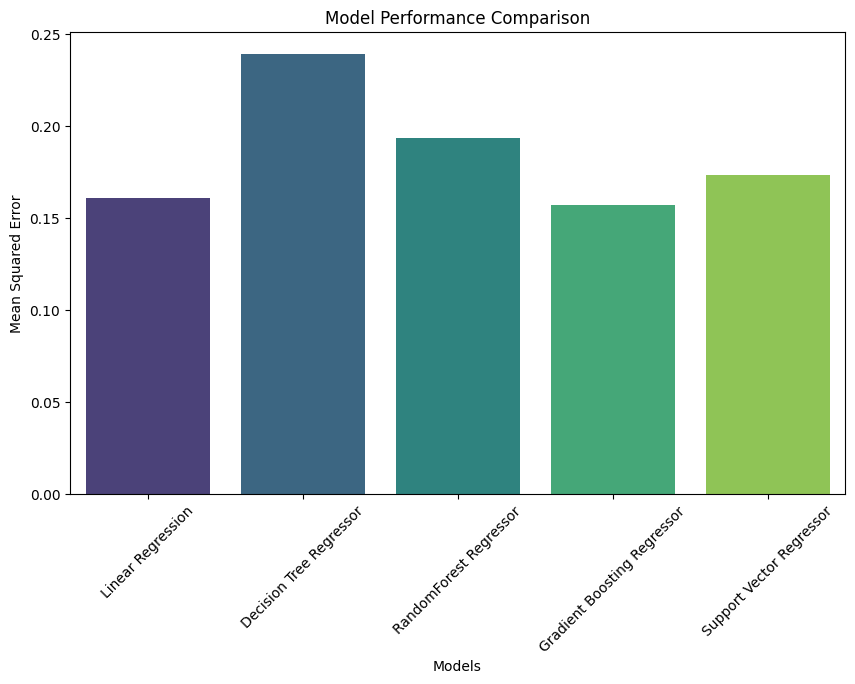

In [15]:
# Import necessary library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Bar Plot: Model Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_performance.keys()),
y=list(model_performance.values()), palette='viridis')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()
